In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Delete unnecessary columns and rename "v1" and "v2"

In [3]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns_to_drop, inplace=True, axis=1)
df=df.rename(columns={"v1":"Category","v2":"Message"})

In [4]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

#### Check if there are duplicated samples in the data

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

#### Visualize Distribution of Email Categories

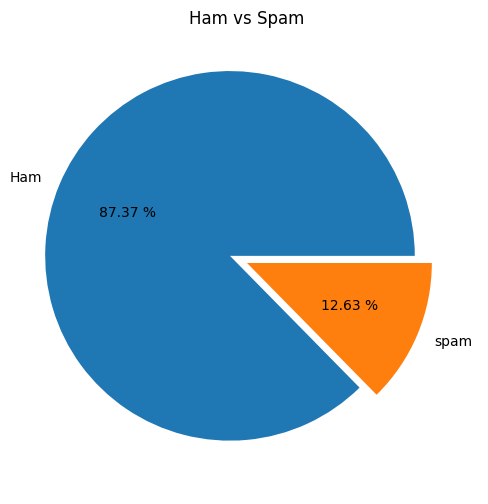

In [8]:
number_of_spam = df[df['Category'] == 'spam'].shape[0]
number_of_ham = df[df['Category'] == 'ham'].shape[0]

plt.figure(figsize=(7,6))
plt.title("Ham vs Spam")

sizes = [number_of_ham, number_of_spam]
labels = ["Ham","spam"]
explode = [0.1,0]
plt.pie(sizes, labels=labels, explode=explode, autopct="%.2f %%")
plt.show()

### Make a 'spam' column and replace spams with 1 and replace hams with 0

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['spam']=le.fit_transform(df["Category"])
df.drop('Category',axis=1,inplace=True)

In [10]:
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### spliting the data for train and test

In [11]:
x = df['Message']
y = df['spam']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

### words frequency using countvectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)

### Train the naive bayes model
##### There are three main types of NB models(Bernouli,Multinominal,Gaussian).While **Gaussian** Naive Bayes is a powerful classifier suitable for **numerical** features following a **Gaussian distribution**, it's not applicable to this project's context. Our features are based on word frequencies in text data, which are **discrete** and follow a **multinomial distribution**. Therefore, Gaussian Naive Bayes, designed for continuous data, isn't appropriate for this task and I'm gonna use the Multinominal NB.

In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [14]:
mnb.fit(x_train_counts,y_train)

MultinomialNB()

### Now, let's create a bag-of-words representation using CountVectorizer, this time for the test data **x_test**

In [15]:
x_test_counts = vectorizer.transform(x_test)

In [16]:
y_pred = mnb.predict(x_test_counts)

In [17]:
mnb.score(x_test_counts,y_test)

0.9854932301740812

### Display the confusion matrix

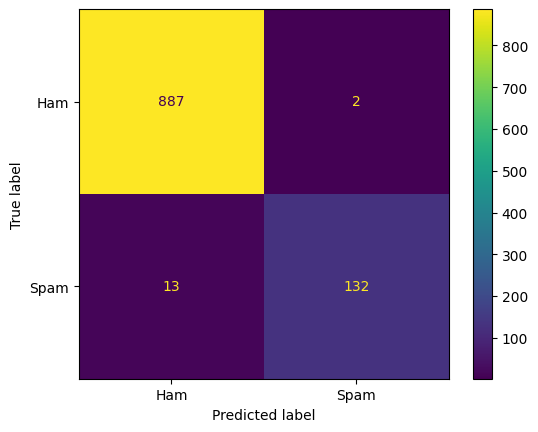

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Ham","Spam"])
cm_display.plot()
plt.show()

In [20]:
import joblib
joblib.dump(mnb,"predict_email")

['predict_email']